In [1]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# 1. Read training data

In [3]:
df = pd.read_csv("data/9_clean_training_data/clean_training_data.csv")
df

,source,id,date,gwl_cm,lat,lon,LIA,VH,VV,VVVH_ratio,...,doy,region_id,geometry,index_right,island,province,phu_name,aoi_phu,tile_id,phu_id
0,pkeg,02_AHL_SBG-B076,2021-06-01,-41.0,3.937760,117.007750,32.785855,-11.481278,-5.556430,0.207099,...,152,10,POINT (117.00775 3.93776),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
1,pkeg,02_AHL_SBG-B076,2021-08-24,-38.0,3.937760,117.007750,32.785295,-12.812067,-5.960235,0.201164,...,236,10,POINT (117.00775 3.93776),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
2,pkeg,02_AHL_SBG-B076,2022-04-09,-22.0,3.937760,117.007750,32.795191,-18.437775,-10.636812,0.072032,...,99,10,POINT (117.00775 3.93776),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
3,pkeg,02_AHL_SBG-B076,2023-02-15,-31.0,3.937760,117.007750,32.793740,-13.051827,-9.007584,0.076149,...,46,10,POINT (117.00775 3.93776),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
4,pkeg,02_AHL_SBG-B101,2021-06-01,-66.0,3.931860,117.010120,39.267563,-9.778736,-6.648683,0.111111,...,152,10,POINT (117.01012 3.93186),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32558,old_brg,kalteng1,2020-02-24,-23.9,-2.319728,114.058131,32.478706,-12.878587,-8.271499,0.097345,...,55,8,POINT (114.058131 -2.319728),137.0,Kalimantan,Central Kalimantan,KHG Sungai Kahayan - Sungai Sebangau,KAL_User_12,12.0,137.0
32559,old_brg,kalteng1,2020-03-07,-31.1,-2.319728,114.058131,32.478589,-13.078360,-6.593164,0.169898,...,67,8,POINT (114.058131 -2.319728),137.0,Kalimantan,Central Kalimantan,KHG Sungai Kahayan - Sungai Sebangau,KAL_User_12,12.0,137.0
32560,old_brg,kalteng1,2020-03-19,-14.7,-2.319728,114.058131,32.479968,-12.563061,-7.793232,0.110794,...,79,8,POINT (114.058131 -2.319728),137.0,Kalimantan,Central Kalimantan,KHG Sungai Kahayan - Sungai Sebangau,KAL_User_12,12.0,137.0
32561,old_brg,kalteng1,2020-03-31,-27.1,-2.319728,114.058131,32.480674,-13.179518,-7.523130,0.128794,...,91,8,POINT (114.058131 -2.319728),137.0,Kalimantan,Central Kalimantan,KHG Sungai Kahayan - Sungai Sebangau,KAL_User_12,12.0,137.0


<Axes: xlabel='region_id', ylabel='gwl_cm'>

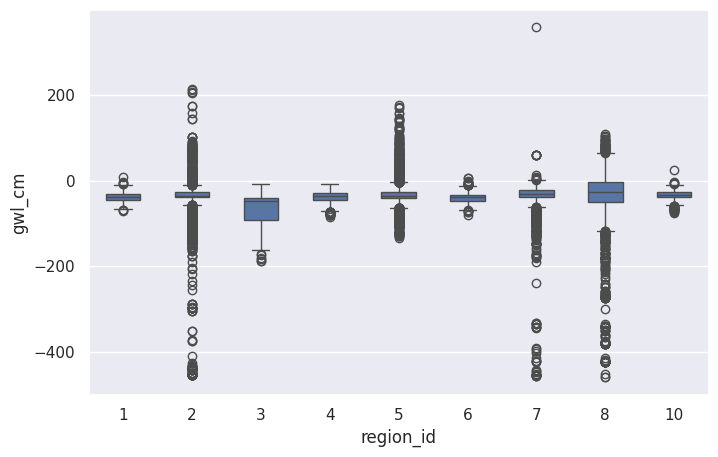

In [4]:
# get a boxplot of response var per region but use a small graph size

# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="region_id", y="gwl_cm", data=df, width=0.5)

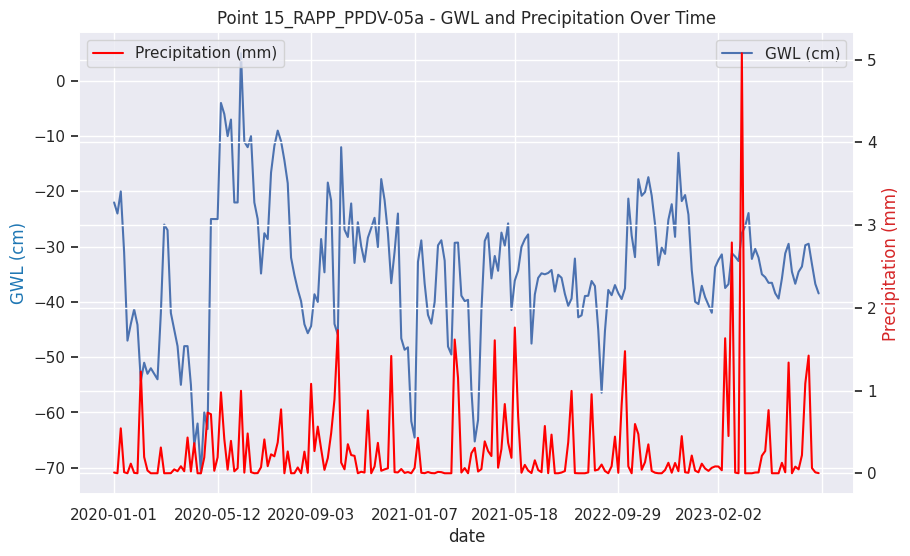

In [5]:
# Filter the DataFrame for the specific point '15_RAPP_PPDV-05a'
point_df = df[df.id == '15_RAPP_PPDV-05a']
point_df = point_df.sort_values(by=['date'])

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Create the first y-axis for "gwl" data
ax1 = sns.lineplot(x="date", y="gwl_cm", data=point_df, label="GWL (cm)")

# Set the first y-axis label
ax1.set_ylabel("GWL (cm)", color='tab:blue')

# Create the second y-axis for "precipitation" data
ax2 = ax1.twinx()
sns.lineplot(x="date", y="precipitation", data=point_df, color='red', label="Precipitation (mm)")

# Set the second y-axis label
ax2.set_ylabel("Precipitation (mm)", color='tab:red')

# Use MonthLocator for sparse labeling
ax1.xaxis.set_major_locator(MonthLocator())

# Set the title and x-axis label
plt.title(f"Point 15_RAPP_PPDV-05a - GWL and Precipitation Over Time")
plt.xlabel("Date")

# Add legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

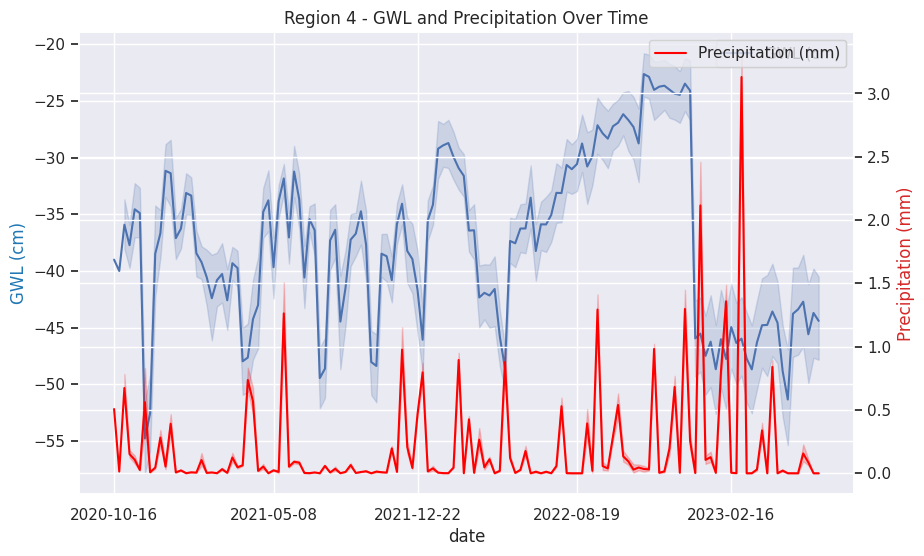

In [6]:
# Filter the DataFrame for the specific region
region_df = df[df.region_id == 4]
region_df = region_df.sort_values(by=['date'])

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Create the first y-axis for "gwl" data
ax1 = sns.lineplot(x="date", y="gwl_cm", data=region_df, label="GWL (cm)")

# Set the first y-axis label
ax1.set_ylabel("GWL (cm)", color='tab:blue')

# Create the second y-axis for "precipitation" data
ax2 = ax1.twinx()
sns.lineplot(x="date", y="precipitation", data=region_df, color='red', label="Precipitation (mm)")

# Set the second y-axis label
ax2.set_ylabel("Precipitation (mm)", color='tab:red')

# Set the title and x-axis label
plt.title(f"Region {4} - GWL and Precipitation Over Time")
plt.xlabel("Date")

# Use MonthLocator for sparse labeling
ax1.xaxis.set_major_locator(MonthLocator())

# Add legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.show()

## GWL timeseries in points for PHU 781

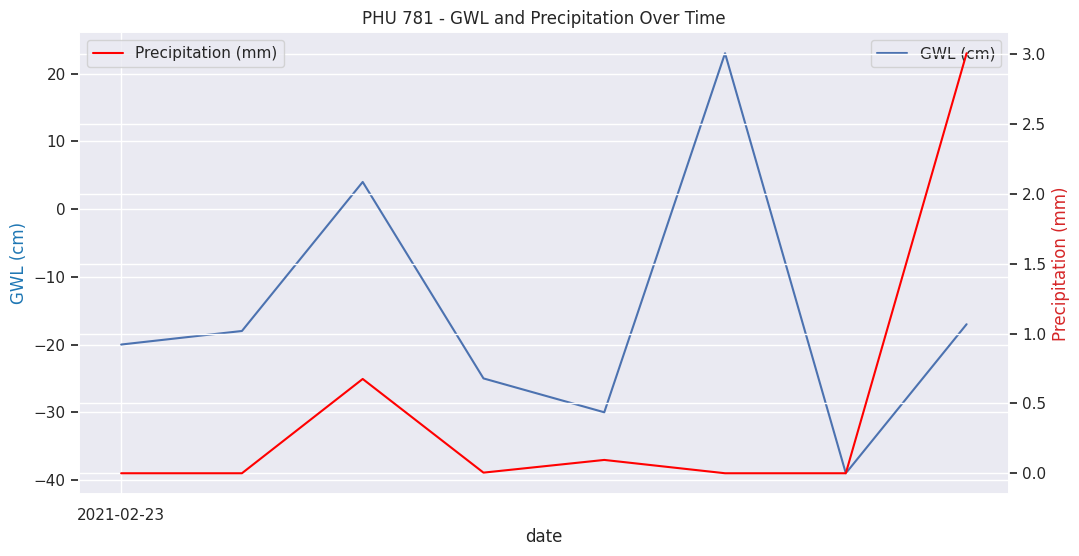

In [7]:
# Filter the DataFrame for the specific region

phu_id = 781

region_df = df[df.id == "15_RAPP_LGBI-018a"]
region_df = region_df.sort_values(by=['date'])

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Create the first y-axis for "gwl" data
ax1 = sns.lineplot(x="date", y="gwl_cm", data=region_df, label="GWL (cm)")

# Set the first y-axis label
ax1.set_ylabel("GWL (cm)", color='tab:blue')

# Create the second y-axis for "precipitation" data
ax2 = ax1.twinx()
sns.lineplot(x="date", y="precipitation", data=region_df, color='red', label="Precipitation (mm)")

# Set the second y-axis label
ax2.set_ylabel("Precipitation (mm)", color='tab:red')

# Set the title and x-axis label
plt.title(f"PHU {phu_id} - GWL and Precipitation Over Time")
plt.xlabel("Date")

# Use MonthLocator for sparse labeling
ax1.xaxis.set_major_locator(MonthLocator())

# Add legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.show()

# Create a correlation matrix between dependent and independent variables

In [8]:
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [9]:
df = pd.read_csv("data/9_clean_training_data/clean_training_data.csv")

print("len before: ", len(df))
print("number of stations before: ", len(df.id.unique()))

# count values by id and remove those with less than 9 values

df = df.groupby('id').filter(lambda x : len(x)>8) # using the data from all the stations we don't need to filter by the minimum number
print("len after: ", len(df))
print("number of stations after: ", len(df.id.unique()))

len before:  32563
number of stations before:  2032
len after:  26592
number of stations after:  820


In [10]:
# Get the list of variables (column names)
variables = df.columns.tolist()

# Print the list of variables
print("List of variables:")
for var in variables:
    print(var)

List of variables:
source
id
date
gwl_cm
lat
lon
LIA
VH
VV
VVVH_ratio
angle
sm_1
sm_3
sm_7
sm_30
precipitation
prec_3
prec_7
prec_30
elevation
aspect
slope
land_cov
canopy_height
gldas_mean
gldas_stddev
B3
B4
B5
B7
ndvi
ndmi
ndbri
distance
dir
acc
doy
region_id
geometry
index_right
island
province
phu_name
aoi_phu
tile_id
phu_id


In [11]:
unique_phu_names = df['phu_name'].unique().tolist()
unique_phu_names

['KHG Sungai Sebuku - Sungai Sembakung',
 'KHG Sungai Mentarang - Sungai Belayu',
 'KHG Sungai Seruyan - Sungai Kelua Besar',
 'KHG Sungai Kapuas - Sungai Mendawak',
 'KHG Sungai Terentang - Sungai Kapuas',
 'KHG Krueng Surin - Krueng Muling',
 'KHG Sungai Rokan - Sungai Kubu',
 'KHG Sungai Kampar Kiri - Sungai Segati',
 'KHG Sungai Siak Kecil - Sungai Siak',
 'KHG Pulau Padang',
 'KHG Sungai Siak - Sungai Kampar',
 'KHG Sungai Sugihan - Sungai Lumpur',
 'KHG Sungai Kapuas - Sungai Barito',
 'KHG Sungai Pukun - Sungai Seruyan',
 'KHG Sungai Lalan - Sungai Merang',
 'KHG Sungai Merang - Sungai Ngirawan',
 'KHG Sungai Rokan - Sungai Siak Kecil',
 'KHG Pulau Bengkalis',
 'KHG Sungai Batanghari - Sungai Air Hitam Laut',
 'KHG Sungai Baung - Sungai Betara',
 'KHG Sungai Betara - Sungai Mendahara',
 'KHG Sungai Pengabuan - Sungai Baung',
 'KHG Sungai Mendahara - Sungai Batanghari',
 'KHG Sungai Sambas Besar - Sungai Seiyung',
 'KHG Sungai Mempawah - Sungai Peniti',
 'KHG Sungai Kapuas - Sung

In [12]:
# Select the desired phu
phu = 'KHG Sungai Kahayan - Sungai Kapuas'
#subset_df = df[df['phu_name'] ==  'KHG Sungai Siak - Sungai Kampar']
subset_df = df[df['phu_name'] == phu]
subset_df['date'].unique().tolist()

['2019-08-04',
 '2019-08-11',
 '2019-08-16',
 '2019-08-23',
 '2019-09-04',
 '2019-10-27',
 '2019-11-15',
 '2019-11-20',
 '2019-11-27',
 '2019-12-02',
 '2019-12-09',
 '2019-12-14',
 '2019-12-21',
 '2020-01-31',
 '2020-02-07',
 '2019-09-09',
 '2019-09-16',
 '2019-09-21',
 '2019-09-28',
 '2019-10-10',
 '2019-10-15',
 '2019-10-22',
 '2019-11-03',
 '2019-11-08',
 '2019-12-26',
 '2020-01-02',
 '2020-01-07',
 '2020-01-14',
 '2020-01-26',
 '2020-02-12',
 '2020-02-19',
 '2020-02-24',
 '2020-03-02',
 '2020-03-07',
 '2020-03-14',
 '2020-03-19',
 '2020-03-26',
 '2020-03-31',
 '2020-04-07',
 '2020-04-12',
 '2018-12-07',
 '2018-12-19',
 '2018-12-31',
 '2019-01-12',
 '2019-01-24',
 '2019-02-05',
 '2019-02-17',
 '2019-03-01',
 '2019-03-13',
 '2019-03-25',
 '2019-04-06',
 '2019-04-18',
 '2019-04-30',
 '2019-05-12',
 '2019-06-05',
 '2019-06-17',
 '2019-06-29',
 '2019-07-11',
 '2019-07-23',
 '2019-08-28',
 '2020-04-24',
 '2020-05-18',
 '2020-06-11',
 '2020-06-23',
 '2020-08-10',
 '2020-08-22',
 '2020-09-

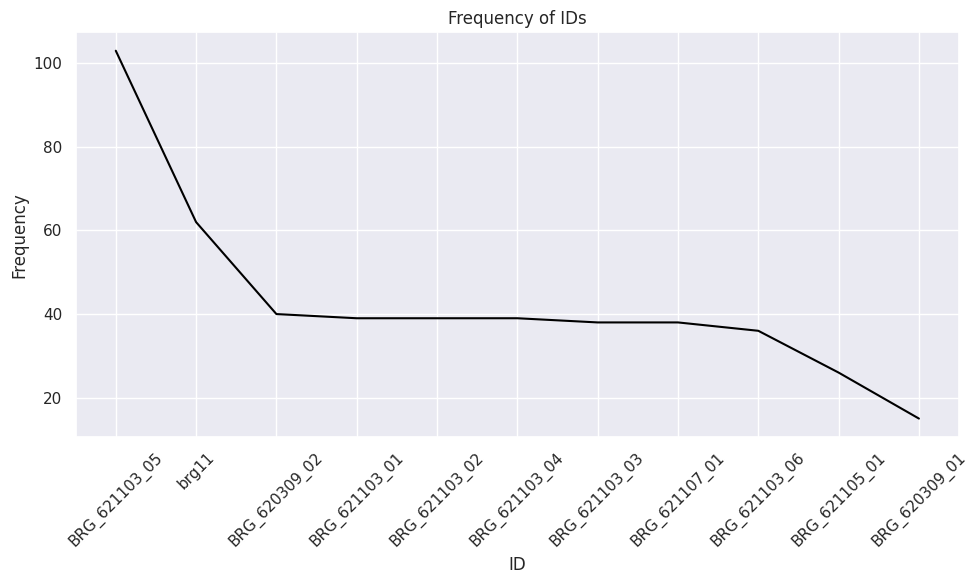

In [13]:
id_counts = subset_df['id'].value_counts()

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.plot(id_counts, color='black')  # Set color to black and specify number of bins
plt.title('Frequency of IDs')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
id_counts

id
BRG_621103_05    103
brg11             62
BRG_620309_02     40
BRG_621103_01     39
BRG_621103_02     39
BRG_621103_04     39
BRG_621103_03     38
BRG_621107_01     38
BRG_621103_06     36
BRG_621105_01     26
BRG_620309_01     15
Name: count, dtype: int64

In [15]:
explanatory = [
    "doy","LIA","angle",
    'VV', 'VH', 'VVVH_ratio', 
    'precipitation', 'prec_3', 'prec_7', 'prec_30', 
    'sm_1',  'sm_3', 'sm_7', 'sm_30'
]

In [16]:
variable = 'gwl_cm'

training_df = df.copy() # Using the data for all stations
#training_df = subset_df.copy()
row = {}

# All but one PHU for training
for i, station_id in enumerate(training_df.id.unique()):
    explans = []
    
    station_df = training_df[training_df.id == station_id]

    # add correlation of explanatories
    for expl in explanatory:
        explans.append(station_df[variable].corr(station_df[expl]))

    row[station_id] = explans

stats_df = pd.DataFrame.from_dict(row, orient='index')

In [17]:
stats_df.columns = explanatory

# Create the mean correlation column and sort
stats_df.loc[:, 'mean_'] = stats_df.mean(axis=1)
stats_df = stats_df.sort_values(by=['mean_'], ascending=False)


<Axes: >

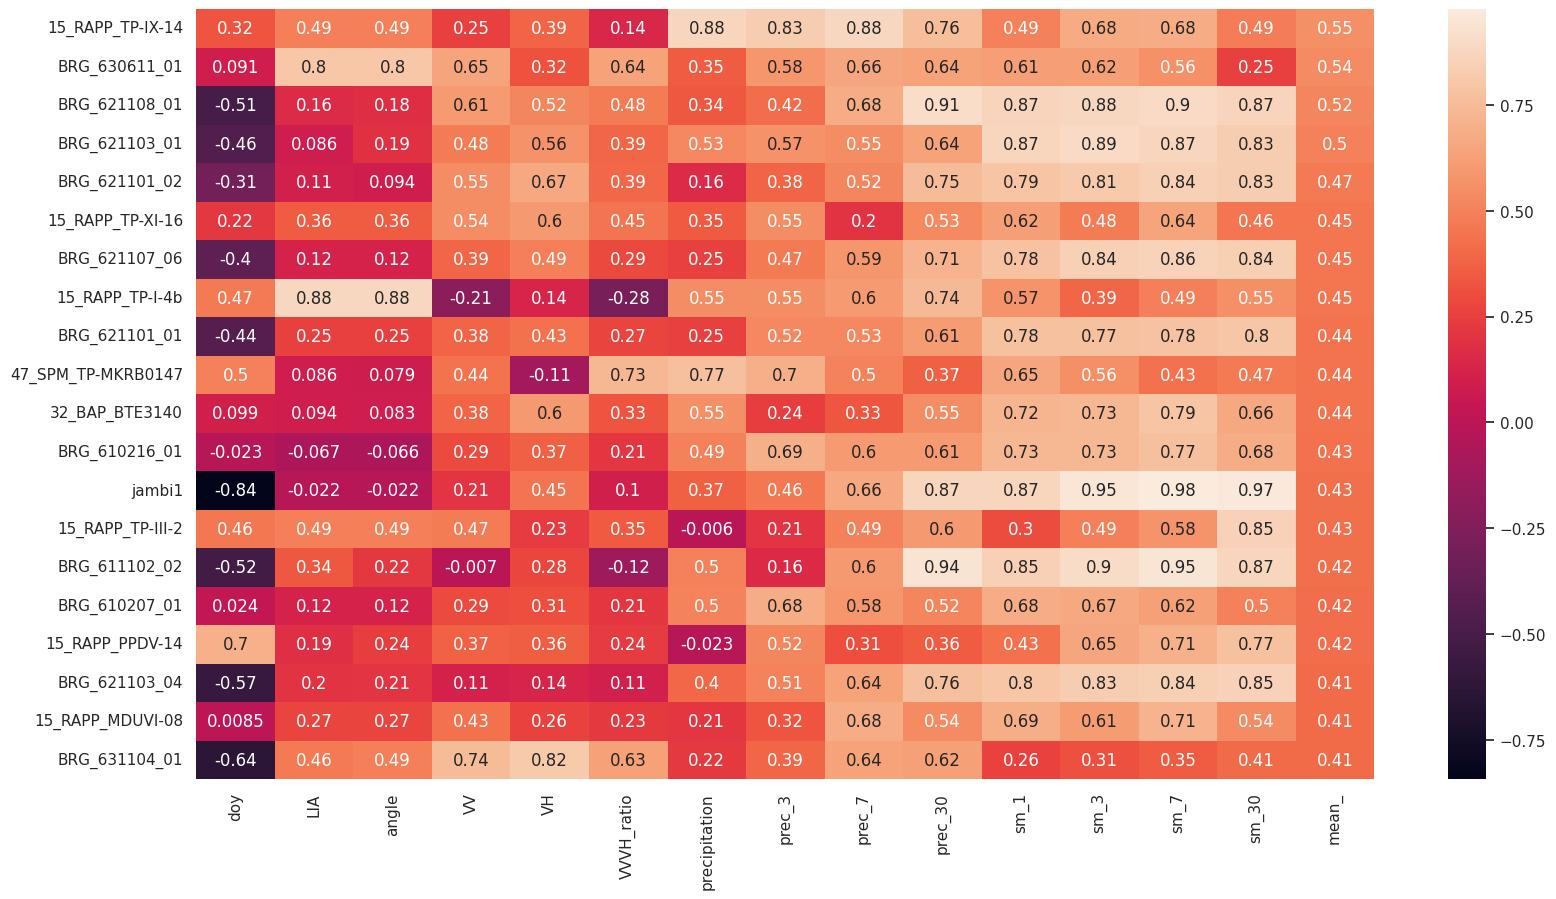

In [18]:
rows_to_display = 20
plt.rcParams["figure.figsize"] = (19, rows_to_display / 2)
sns.heatmap(stats_df.head(rows_to_display), annot=True)

<Axes: xlabel='mean_'>

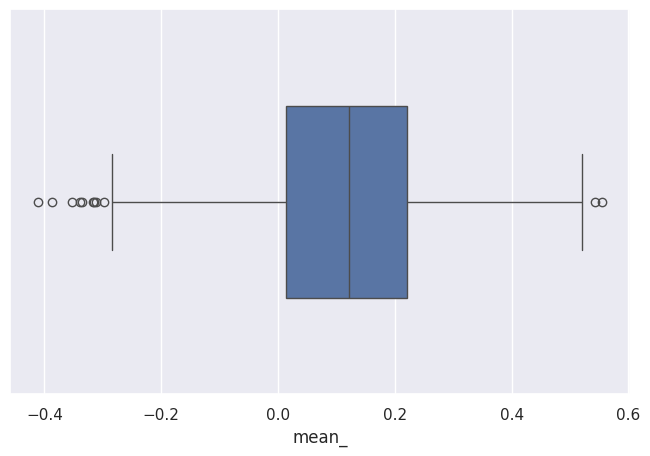

In [19]:
# Create a boxplot of the mean correlation
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="mean_", data=stats_df, width=0.5)


In [20]:
threshold = 0.3
high_corr = pd.DataFrame(stats_df[stats_df.mean_ >= threshold].index.unique())
#name = f"high_corr_{threshold}_temporal_variables_station_ids_{phu}.csv"
name = f"high_corr_{threshold}_temporal_variables_station_ids_all.csv"

len(high_corr), name

(95, 'high_corr_0.3_temporal_variables_station_ids_all.csv')

In [21]:
high_corr.to_csv(f"data/{name}", index=False)

In [22]:
# open unieqe points geopackage file
unique_points = gpd.read_file("data/0_shp/unique_stations_no_repeated.shp")

# merge the stats_df with the unique_points
unique_points = unique_points.merge(stats_df, left_on='id', right_index=True)

# save the unique_points as a geopackage file
unique_points.to_file(f"data/0_shp/unique_stations_no_repeated_{name}.gpkg", driver='GPKG')